# Introduction to data structures in geopandas

Now that you have seen how to create and represent geometric objects in Python using `shapely`, we will continue on learning various GIS techniques using a library called `geopandas` [^geopandas]. `geopandas` is a library designed to make working with geospatial data in Python easier. It extends the data types used by `pandas` (which we covered in Part I) to allow geospatial operations and the handling of coordinate reference systems. Essentially, it provides a high-level interface for vector data (like points, lines, and polygons) that integrates with the existing `pandas` data analysis framework, as well as the extensive Python GIS ecosystem (see Figure 5.1 in Chapter 5). `geopandas` is one of the core libraries for GIS in Python and it is widely used in different sectors (academia, industry, etc.) for geographic data analysis. In the next sections, we will introduce the basic data structures that are used to work with geographic data using `geopandas`, namely {term}`GeoSeries` and {term}`GeoDataFrame`. 

## What is a GeoDataFrame?

The main data structures in `geopandas` are `GeoSeries` and `GeoDataFrame`. Essentially, they extend the capabilities of the `Series` and `DataFrame` data structures of `pandas`. This means that we can use many familiar methods from `pandas` also when working with `geopandas` and geographic data. A `GeoDataFrame` is basically like a `pandas.DataFrame` that contains at least one dedicated column for storing geometries (see Figure 6.10). The geometry column is a `GeoSeries` which contains the geometries as shapely objects (points, lines, polygons, multipolygons etc.). As we learned in the previous section, `shapely` provides many useful attributes and methods to work with geometries. Luckily, these same functionalities can be directly applied to `GeoSeries` making it convenient to work with data layers that may contain thousands or even millions of geographic features. In this section, you will learn various useful techniques and tools bundled in `geopandas` that help you to work with geographic data in vector format.

![_**Figure 6.10**. Geometry column in a GeoDataFrame._](../img/geodataframe.png)

_**Figure 6.10**. Geometry column in a GeoDataFrame._

## Reading a file

Like with `pandas`, a typical first step when starting to work with `geopandas` is to read data from a given file. In `geopandas`, we can use a generic function `.read_file()` for reading geospatial data from various data formats, such as the ones introduced in Chapter 5. The data folder contains census data from Austin, Texas downloaded from the [U.S Census bureau](https://www.census.gov/programs-surveys/acs/data.html) [^us_census] which we will use to introduce some of the basic data input/output functionalities of `geopandas`. Let's start by defining the path to the file that we want to access: 

In [67]:
from pathlib import Path

data_folder = Path("data", "Austin")
fp = data_folder / "austin_pop_2019.gpkg"
print(fp)

data/Austin/austin_pop_2019.gpkg


Similar to importing `pandas`, we will first import `geopandas` as `gpd` which allows us to start using the library. Then we will read the file by passing the filepath to `.read_file()` function of `geopandas`:

In [4]:
import geopandas as gpd

data = gpd.read_file(fp)

You can use the `.read_file()` command in this way to read data from many different vector formats (GeoPackage, Shapefile, GeoJSON, etc.). Hence, it is very easy to start working with geographic data using `geopandas`. Let's take a look at the data type of our `data` variable:

In [5]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame` which extends the functionalities of a `DataFrame` to handle spatial data as discussed earlier. We can apply many familiar `pandas` methods to explore the contents of our `GeoDataFrame`. Let's have a closer look at the first rows of the data: 

In [6]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


We can see that there are three columns in our `GeoDataFrame`. The columns `pop2019` and `tract` represent attribute information in our data, namely the number of people living on a given census tract and a unique id-number for the tract, wherease the column `geometry` contains the geographic data (polygons) for each census tract.

It is always a good idea to explore your geographic data on a map. Creating a simple map from a geodataframe is really easy. You can use the `.plot()` method bundled in the `GeoDataFrame` instance to create a map based on the geometries of the data. Under the hood, `geopandas` actually uses `matplotlib` for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data:

<Axes: >

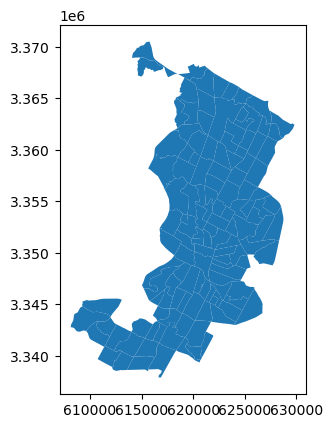

In [7]:
data.plot()

_**Figure 6.11**. Census tract polygons for Austin, Texas, USA._

Voilá! Here is our first map created with `geopandas`! This map gives a quick overview of how the geometries of the cencus tracts are located in the given region. The `x` and `y` axes in the plot are based on the coordinate values of the geometries which are in this case represented as meters.

#### Question 6.2

Figure out the following information from our input data using your `pandas` skills:
    
- Number of rows?
- Number of census tracts (based on column `tract`)?
- Total population (based on column `pop2019`)?

In [6]:
# You can use this cell to enter your solution.

In [7]:
# Solution

print("Number of rows", len(data))
print("Number of census tract", data["tract"].nunique())
print("Total population", data["pop2019"].sum())

Number of rows 130
Number of census tract 130
Total population 611935.0


## Geometries in geopandas

By default, `geopandas` looks for the geometries from an attribute called `.geometry`, which is ultimately a `GeoSeries` data structure containing `shapely` geometric objects. In practice, the `.geometry` attribute links to a specific column in the `GeoDataFrame`. By default the geometries are stored into column named `"geometry"`, when you read a file with geographic data. However, it's good to be aware that a geodataframe can have multiple columns containing geometries, and you can change which column should be considered as the "active geometry" (see Chapter 6.3.7 for details). Let's have a closer look at the `.geometry` attribute of our data:

In [9]:
data.geometry.head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [10]:
type(data.geometry)

geopandas.geoseries.GeoSeries

As we can see here,  the `geometry` attribute contains polygon geometries stored in a `GeoSeries` data structure. The last output line of the `.head()` command reveals that the data type (`dtype`) of this column is `geometry`, i.e. geometries have their own data type. As we learned earlier, the `shapely.geometry` objects have various useful attributes and methods that we can use to work with geographic data. Luckily, it is possible to use these `shapely` methods directly in `geopandas` and apply them to a whole `GeoSeries` without a need to access individual geometries one by one. With this in mind, let's proceed and extract information about the area of each census tract polygon. Extracting the area for all geometries in our data can be done easily by calling the attribute `.area` which is part of the `GeoDataFrame` object. As a reminder, the census data are in a metric coordinate reference system, so the area values will be given in square meters:

In [12]:
data.geometry.area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

The same result can be achieved by using the syntax `data.area`. Let's convert the area values from square meters to square kilometers and store them into a new column called `area_km2`:

In [13]:
data["area_km2"] = data.area / 1000000
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


As we can see, now we added a new column into our `GeoDataFrame` which contains the area of each polygon as square kilometers. Now you have succesfully conducted your first geocomputational analysis in Python! Quite easy isn't it? We can also very easily visualize the data and make a nice choropleth map by using the area of a given geometry to determine the color for it. To do this, we can use the parameter `column` of the `.plot()` method in `geopandas` to specify that the color for each polygon should be based on the values stored in the `area_km2` column:  

<Axes: >

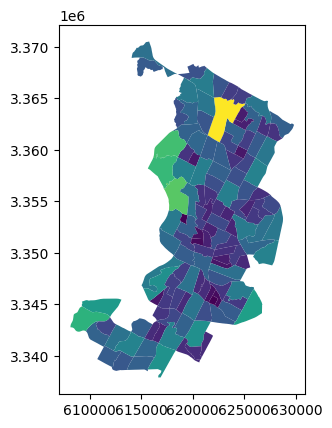

In [11]:
data.plot(column="area_km2")

_**Figure 6.12**. A map showing census tracts colored based on the size of the polygon._

As a result, we can more easily spot the larger polygons from the map with brighter colors. There are various ways to modify the appearance of the map and colors, which we will learn later in Chapter 8.

#### Question 6.3

Using your `pandas` skills, create a new column `pop_density_km2` and populate it with population density values (population / km2) calculated based on columns `pop2019` and `area_km2`. Print out answers to the following questions:

- What was the average population density in 2019?
- What was the maximum population density per census tract?

In [12]:
# Use this cell to enter your solution.

In [13]:
# Solution

# Calculate population density
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

# Print out average and maximum values
print("Average:", round(data["pop_density_km2"].mean()), "pop/km2")

print("Maximum:", round(data["pop_density_km2"].max()), "pop/km2")

Average: 2397 pop/km2
Maximum: 11324 pop/km2


## Writing data into a file

In a similar way as reading data, writing the contents of your `GeoDataFrame` into a specific file is one of the most typical operations when working with geographic data. It is possible to export the `GeoDataFrame` into various data formats using the `.to_file()` method. Let's start by learning how we can write data into a `GeoPackage`. Before proceeding, let's see how the data looks like at this point:

In [14]:
data.head()

,pop2019,tract,geometry,area_km2,pop_density_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208,1887.538655


Writing the contents of this `GeoDataFrame` into a file can be done using the `.to_file()` method. To use the method, we need to pass the filepath to the output file. For the most common geospatial file formats (e.g. GPKG, ESRI Shapefile, GeoJSON, GML, MapInfo File, FlatGeobuf), `geopandas` automatically identifies the correct file format based on the file extension that have been written after the dot in the file path. For instance in the example below, the text `.gpkg` at the end of the `output_fp` variable is sufficient to determine that the `GeoDataFrame` should be written in GeoPackage format:

In [14]:
# Create a output path for the data
output_fp = "data/Temp/austin_pop_density_2019.gpkg"

# Write the file
data.to_file(output_fp)

Now we have successfully stored the data into a file called `austin_pop_density_2019.gpkg`. To be more explicit, you can use the `driver` parameter to specify the output file format for the data allowing you to write the data into numerous data formats (some lesser-known ones as well) supported by a software called `GDAL` which is used by `geopandas` under the hood for reading and writing data. As an input, you should give the name of the `driver` as a string (see the names from [GDAL documentation](https://gdal.org/drivers/vector/index.html)[^GDAL_drivers]), such as `FlatGeobuf` which is used to write the data into a performant FlatgeoBuf file format that supports fast reading and writing of geospatial data:

In [21]:
output_fp = "data/Temp/austin_pop_density_2019.fgb"

# Write the file
data.to_file(output_fp, driver="FlatGeobuf")

Whenever writing data, notice, that if you have an existing file with the same name, `geopandas` will automatically overwrite the contents (without asking). Hence, it is good to be a bit mindful about the naming of the files whenever writing data to disk. Some fileformats also supports appending to existing files. You can enable this functionality by using the `mode` parameter and specifying `mode='a'` which will add rows into an existing output file. Notice, that not all file formats support this functionality and if you do use this functionality, the data structure between the existing and the appended data should match. 


#### Question 6.4

Read the output file using `geopandas` and check that the data looks ok.

In [19]:
# Use this cell to enter your solution.

In [20]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

# You can also plot the data for a visual check by uncommenting the following
# temp.plot()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,pop2019,tract,area_km2,geometry
0,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,6070.0,002422,4.029772,"POLYGON Z ((-97.79891 30.17448 0, -97.79888 30..."
1,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,2203.0,001751,1.532030,"POLYGON Z ((-97.76612 30.36053 0, -97.76572 30..."
2,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,7419.0,002411,3.960344,"POLYGON Z ((-97.76163 30.20171 0, -97.76089 30..."
3,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,4229.0,000401,2.181762,"POLYGON Z ((-97.73545 30.28017 0, -97.73511 30..."
4,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,4589.0,002313,2.431208,"POLYGON Z ((-97.736 30.23166 0, -97.7351 30.23..."


## Different file formats for reading and writing geographic data 

There exists numerous GIS data formats, such as [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage) [^GPKG], [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) [^GeoJson], [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) [^KML], and [Shapefile](https://en.wikipedia.org/wiki/Shapefile) [^shp]. It is possible to read data from all these formats (plus many more) straight out of the box by `geopandas`. In the following, we will show some typical examples how to read (and write) data from different sources. The main point in this section is to demonstrate the basic syntax for reading and writing data using short code snippets.

### Reading vector data

When we use the `.read_file()` function for reading data in various formats, `geopandas` actually uses a Python library called `pyogrio` under the hood to read the data (which again depends on `GDAL` software written mostly in C++ language). This means that you can read and write all data formats that are supported by `pyogrio`. It is easy to find out all the data formats that are supported by default by calling `pyogrio.list_drivers()`: 

In [4]:
import geopandas as gpd
import pyogrio

available_drivers = pyogrio.list_drivers()

print(available_drivers)
len(available_drivers)

{'FITS': 'rw', 'PCIDSK': 'rw', 'netCDF': 'rw', 'PDS4': 'rw', 'VICAR': 'rw', 'JP2OpenJPEG': 'r', 'PDF': 'rw', 'MBTiles': 'rw', 'TileDB': 'rw', 'BAG': 'rw', 'EEDA': 'r', 'OGCAPI': 'r', 'ESRI Shapefile': 'rw', 'MapInfo File': 'rw', 'UK .NTF': 'r', 'LVBAG': 'r', 'OGR_SDTS': 'r', 'S57': 'rw', 'DGN': 'rw', 'OGR_VRT': 'r', 'Memory': 'rw', 'CSV': 'rw', 'NAS': 'r', 'GML': 'rw', 'GPX': 'rw', 'LIBKML': 'rw', 'KML': 'rw', 'GeoJSON': 'rw', 'GeoJSONSeq': 'rw', 'ESRIJSON': 'r', 'TopoJSON': 'r', 'Interlis 1': 'rw', 'Interlis 2': 'rw', 'OGR_GMT': 'rw', 'GPKG': 'rw', 'SQLite': 'rw', 'WAsP': 'rw', 'PostgreSQL': 'rw', 'OpenFileGDB': 'rw', 'DXF': 'rw', 'CAD': 'r', 'FlatGeobuf': 'rw', 'Geoconcept': 'rw', 'GeoRSS': 'rw', 'VFK': 'r', 'PGDUMP': 'rw', 'OSM': 'r', 'GPSBabel': 'rw', 'OGR_PDS': 'r', 'WFS': 'r', 'OAPIF': 'r', 'EDIGEO': 'r', 'SVG': 'r', 'Idrisi': 'r', 'XLS': 'r', 'ODS': 'rw', 'XLSX': 'rw', 'Elasticsearch': 'rw', 'Carto': 'rw', 'AmigoCloud': 'rw', 'SXF': 'r', 'Selafin': 'rw', 'JML': 'rw', 'PLSCENES':

78

As we can see from this dictionary, by default there are close to 80 different file formats that are supported for reading data. In the list of supported drivers, `r` is for file formats that `pyogrio/geopandas` can be read, and `w` is for file formats it can write. Letter `a` marks formats for which `pyogrio/geopandas` can append new data to existing files. Let's read the same Austin census data in a Shapefile format to see the basic syntax:

In [7]:
# Read Esri Shapefile
fp = data_folder / "austin_pop_2019.shp"
data = gpd.read_file(fp)
data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2.0,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,3.0,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4.0,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,5.0,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


As you can see, nothing except the file extension at the end of the filename changed, from `.gpkg` into `.shp`. The same syntax works for other common vector data formats, such as GeoJSON or MapInfo TAB format:

In [18]:
# Read file from Geopackage
fp = data_folder / "austin_pop_2019.gpkg"
data = gpd.read_file(fp)

# Read file from GeoJSON
fp = data_folder / "austin_pop_2019.geojson"
data = gpd.read_file(fp)

# Read file from Geodatabase
fp = data_folder / "austin_pop_2019.gdb"
data = gpd.read_file(fp)

# Read file from KML
fp = "data/Austin/austin_pop_2019.kml"
data_kml = gpd.read_file(fp)

# Read file from MapInfo TAB
fp = data_folder / "austin_pop_2019.tab"
data = gpd.read_file(fp)

data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.49 3338728.49, 615645.48 3338..."
1,2.0,2203.0,001751,"POLYGON ((618576.59 3359381.06, 618614.33 3359..."
2,3.0,7419.0,002411,"POLYGON ((619200.16 3341784.65, 619270.85 3341..."
3,4.0,4229.0,000401,"POLYGON ((621623.75 3350508.16, 621656.29 3350..."
4,5.0,4589.0,002313,"POLYGON ((621630.24 3345130.75, 621717.92 3345..."


Some file formats such as GeoPackage may contain multiple layers with different names which can be speficied using the `layer` -parameter. Our example geopackage file has only one layer with the same name as the file, so we don't actually need to specify it to read in the data, but we can of course:

In [9]:
# Read spesific layer from Geopackage
fp = data_folder / "austin_pop_2019.gpkg"
data = gpd.read_file(fp, layer="austin_pop_2019")

Note that the `KML` file format is a bit of a special case as it is designed for Google Earth rendering in 3D, so there may be additional data columns read into the geodataframe:

In [21]:
data_kml.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,pop2019,tract,geometry
0,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,6070.0,002422,"POLYGON Z ((-97.79891 30.17448 0, -97.79888 30..."
1,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,2203.0,001751,"POLYGON Z ((-97.76612 30.36053 0, -97.76572 30..."
2,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,7419.0,002411,"POLYGON Z ((-97.76163 30.20171 0, -97.76089 30..."
3,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,4229.0,000401,"POLYGON Z ((-97.73545 30.28017 0, -97.73511 30..."
4,None,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,4589.0,002313,"POLYGON Z ((-97.736 30.23166 0, -97.7351 30.23..."


However, it easy to filter the extra columns and only keep the ones that we are interested in:

In [40]:
data = data_kml[["pop2019", "tract", "geometry"]].copy()
data.head(2)

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON Z ((-97.79891 30.17448 0, -97.79888 30..."
1,2203.0,001751,"POLYGON Z ((-97.76612 30.36053 0, -97.76572 30..."


### Reading from a ZIP file

Lastly, we demonstrate how it is possible to read data directly from a ZIP file format which can be quite useful especially if you are working with large datasets or a collection of multiple files stored into a single ZIP archive. ZIP file is an archive data format where the data is compressed efficiently. For instance, after zipping Shapefiles, the disk space needed to store the data in the given format will be significantly lower. To read the data from ZIP files, we can use the built-in Python library called `zipfile` and its `ZipFile` object which makes it possible to work with compressed ZIP files. The following example shows how to read data from a compressed ZIP file. Let's start by opening the file into a variable `z` and then read the names of the files stored inside the archive with the method `.namelist()`:

In [24]:
from zipfile import ZipFile

fp = "data/Helsinki/building_points_helsinki.zip"

with ZipFile(fp) as z:
    print(z.namelist())

['building_points_helsinki.gpkg']


As you can see, the given `ZipFile` which is opened in variable `z` contains only a single GeoPackage called `building_points_helsinki.gpkg`. The `with ZipFile(fp) as z:` command here is a standard Python convention to open files in read-format from ZIP files. 

Now as we know the contents of the ZIP file, it is easy to read the contents of the `building_points_helsinki.gpkg` stored inside the file using `geopandas`. When there is only one file inside the ZIP archive and there are no subfolders inside (as in this example), you can read the content directly into a `GeoDataFrame` using the `.read_file()` function:

In [25]:
buildings = gpd.read_file(fp)
buildings.head(2)

,name,geometry
0,None,POINT (24.85584 60.20727)
1,Uimastadion,POINT (24.93045 60.18882)


Ta-da! Now we have succesfully read the GeoPackage from the given ZIP file into a variable `buildings`. 

However, sometimes you might have multiple files and folders stored inside a ZIP archive as in the example below:

In [31]:
fp = "data/Helsinki/Kamppi_layers.zip"

with ZipFile(fp) as z:
    print(z.namelist())

['natural/', 'natural/Kamppi_parks.gpkg', 'built_environment/', 'built_environment/Kamppi_buildings.gpkg', 'built_environment/Kamppi_roads.gpkg']


As can be seen from here, there are two folders inside the ZIP archive: `natural/` and `built_environment/`. These subfolders contain three different GeoPackages (data for parks, buildings and roads). To be able to read the contents of these files, we need to create a filepath that points to a given file inside the ZIP archive considering the folder structure. This can be done easily with a special syntax in which we separate the actual filepath to the ZIP file on a local disk with `!` (explanation mark) character from the folder and file structure inside the archive as follows:


In [32]:
parks_fp = "data/Helsinki/Kamppi_layers.zip!natural/Kamppi_parks.gpkg"

parks = gpd.read_file(parks_fp)
parks.head(2)

,osmid,leisure,name,geometry
0,8042256,park,Pikkuparlamentin puisto,"POLYGON ((385464.223 6672281.159, 385464.274 6..."
1,8042613,park,Simonpuistikko,"POLYGON ((385532.543 6672073.355, 385490.887 6..."


Here, the `data/Helsinki/Kamppi_layers.zip` part of the filepath points to the location of the ZIP file on the disk, whereas the `!natural/Kamppi_parks.gpkg` part corresponds to the structure inside the archive and points to the file that we want to read, i.e. `Kamppi_parks.gpkg`. This works similarly regardless of how many subfolders you have inside the ZIP file as long as the `!` character is used to differentiate the contents of the archive from the location of the ZIP file stored on your computer. If you don't have subfolders inside the ZIP archive but have multiple files stored at the root of the archive, you would just modify the filepath accordingly without the subfolder. In the following we demonstrate this by having two files at the root of the ZIP file and one file located deeper inside the folder structure:

- `data/My_archive.zip!My_first_datafile.gpkg`
- `data/My_archive.zip!My_second_datafile.gpkg`
- `data/My_arhive.zip!Subfolder/Another_folder/My_third_datafile.gpkg`

Thus, in a similar manner, we can also read the two other files from the `Kamppi_layers.zip` ZIP archive:

In [33]:
roads_fp = "data/Helsinki/Kamppi_layers.zip!built_environment/Kamppi_roads.gpkg"
buildings_fp = "data/Helsinki/Kamppi_layers.zip!built_environment/Kamppi_buildings.gpkg"

roads = gpd.read_file(roads_fp)
buildings = gpd.read_file(buildings_fp)

In [36]:
buildings.head(2)

,osmid,building,name,geometry
0,11711721042,yes,Nice Bike Pyörähuolto,POINT (384966.661 6671503.786)
1,8035238,public,Lasipalatsi,"POLYGON ((385459.65 6672184.469, 385456.356 66..."


### Writing to different vector data formats

As we saw earlier, we can save spatial data to various vector data formats using the `.to_file()` method of the `GeoDataFrame`. Similarly as when reading data, this functionality also relies on the `pyogrio` library under the hood. When writing a `GeoDataFrame` into a file, in many cases, you only need to pass a filename/path to the `.to_file()` method, which will then write the data into the given fileformat based on the file extension information. However, for many file formats it is useful to specify the output file format using the `driver` parameter. In the following, we show the syntax for writing to many common geospatial data formats and use the `driver` parameter accordingly in each case:

In [49]:
# Write to Shapefile
outfp = "data/Temp/austin_pop_2019.shp"
data.to_file(outfp, driver="ESRI Shapefile")

# Write to MapInfo Tab
outfp = "data/Temp/austin_pop_2019.tab"
data.to_file(outfp, driver="MapInfo File")

# Write to Geopackage
outfp = "data/Temp/austin_pop_2019.gpkg"
data.to_file(outfp, driver="GPKG")

# Write to GeoJSON
outfp = "data/Temp/austin_pop_2019.geojson"
data.to_file(outfp, driver="GeoJSON")

# Write to KML
outfp = "data/Temp/austin_pop_2019.kml"
data.to_file(outfp, driver="LIBKML")

# Write to File Geodatabase
outfp = "data/Temp/austin_pop_2019.gdb"
data.to_file(outfp, driver="OpenFileGDB")

## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using shapely's geometric objects and geopandas. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into geospatial data layers. Let's first create a simple `GeoDataFrame` based on coordinate information that represents the outlines of the Senate square in Helsinki, Finland. The coordinates below demonstrates the corners of the Senate square, which we can use to create a `Polygon` object in a similar manner as we learned earlier in this chapter. The order of the coordinates should always follow longitude-latitude order (i.e. `x` and `y` coordinates):

In [51]:
from shapely.geometry import Polygon

coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

poly = Polygon(coordinates)

Now we can use this polygon and create a `GeoDataFrame` from scratch with geopandas. The data can be passed in as a list-like object. In our case, we will only have one row and one column of data. We can pass the polygon inside a list, and specify that this data is stored into a column called `geometry` so that geopandas will know to use the contents of that column as the source for geometries. Additionally, we could define the coordinate reference system for the data which we will learn in the next chapter.

In [53]:
newdata = gpd.GeoDataFrame(geometry=[poly])
newdata

,geometry
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,..."


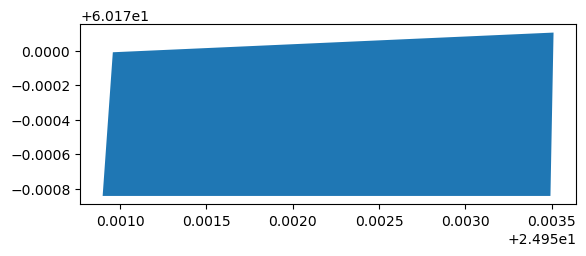

In [56]:
newdata.plot();

In this way, we can easily create a `GeoDataFrame` without any attribute data. However, quite often you also want to attach attribute information along with your geometry. We can create a `GeoDataFrame` from scratch with multiple attributes by passing a Python `dictionary` into the `GeoDataFrame` object as follows: 

In [59]:
gdf_data = {
    "geometry": [poly],
    "name": "Senate Square",
    "city": "Helsinki",
    "year": 2023,
}
new_data_extended = gpd.GeoDataFrame(gdf_data)
new_data_extended

,geometry,name,city,year
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,...",Senate Square,Helsinki,2023


There it is! Now we have four columns in our data, one representing the geometry and other columns with additional attribute information. 

## Creating a GeoDataFrame from a text file

One rather typical situation that you might encounter when working with your course mates or colleagues, is that you receive data that has coordinates but they are stored e.g. in a delimited textfile (or an Excel file). In this case, you cannot directly read the data into `GeoDataFrame` from the text file, but it needs to be converted into geospatial data using the coordinate information. In such a case, we can make use of the `pandas`, `geopandas` and `shapely` libraries for turning the data from a text file into a fully functional `GeoDataFrame`. To demonstrate this, we have some example data below that contains point coordinates of airports derived from [openflights.org](https://openflights.org/data.html) [^openflights]. The operation of turning this data into a `GeoDataFrame` begins with reading the data with pandas into a `DataFrame`. Let's read a couple of useful columns from the data for further processing:

In [60]:
import pandas as pd

airports = pd.read_csv(
    "data/Airports/airports.txt",
    usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"],
)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [61]:
type(airports)

pandas.core.frame.DataFrame

In [62]:
len(airports)

7698

As we can see, now the data was read from a textfile into a regular pandas `DataFrame`. In a similar manner, you can read data with coordinates from numerous file formats supported by pandas. Our data covers over 7000 airports with specific attribute information including the coordinates in the `Latitude` and `Longitude` columns. We can use this coordinate information for turning this data into a `GeoDataFrame` and ultimately visualizing the data on a map. There is a handy function in geopandas called `.points_from_xy()` for generating an array of `Point` objects based on `x` and `y` coordinates. As usual, this function assumes that x-coordinates represent longitude and the y-coordinates represent latitude. The following code snippet shows how we can create geometries for the airports based on these coordinates:

In [63]:
airports["geometry"] = gpd.points_from_xy(
    x=airports["Longitude"], y=airports["Latitude"]
)

airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.5698)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22 -9.44338)


In [64]:
type(airports)

geopandas.geodataframe.GeoDataFrame

The `GeoDataFrame` was created with a couple of steps. First, we created a new column called `geometry` into the `DataFrame` and used the `.points_from_xy()` function to turn the coordinates into shapely `Point` objects. At this stage, the data is still in a `DataFrame` format. The second command in the code snippet converts the pandas `DataFrame` into a `GeoDataFrame` which then has all the capabilities and tools bundled with geopandas. After these two steps, we have succesfully turned the data into geospatial format and we can for example plot the data on a map:

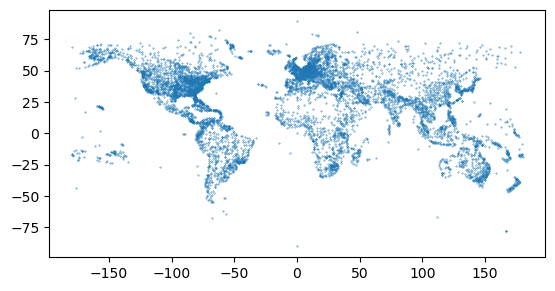

In [66]:
airports.plot(markersize=0.1);

_**Figure 6.13**. A basic plot showing the airports from openflights.org._

## Footnotes

[^GDAL_drivers]: <https://gdal.org/drivers/vector/index.html>
[^GeoJson]: <https://en.wikipedia.org/wiki/GeoJSON>
[^geopandas]: <https://geopandas.org/>
[^GPKG]: <https://en.wikipedia.org/wiki/GeoPackage>
[^KML]: <https://en.wikipedia.org/wiki/Keyhole_Markup_Language>
[^NLS_topodata]: <https://www.maanmittauslaitos.fi/en/maps-and-spatial-data/expert-users/product-descriptions/topographic-database>
[^NLS_lisence]: <https://www.maanmittauslaitos.fi/en/opendata-licence-cc40>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^openflights]: <https://openflights.org/data.html>
[^paituli]: <https://avaa.tdata.fi/web/paituli/latauspalvelu>
[^shp]: <https://en.wikipedia.org/wiki/Shapefile> 
[^topodata_fair]: <https://etsin.fairdata.fi/dataset/5023ecc7-914a-4494-9e32-d0a39d3b56ae>
[^us_census]: <https://www.census.gov/programs-surveys/acs/data.html>